In [1]:
# Library to suppress warnings or deprecation notes 
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd


In [3]:
# Libraries to help with data visualization
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import seaborn as sns

In [4]:
#Loading the dataset - sheet_name parameter is used if there are Basicple tabs in the excel file.
data=pd.read_csv('Buildings.csv')

In [5]:
data.info()


# * There are a lot of missing values in the dataset
# 
# * The dataset has 45 columns and 148000 rows
# 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148000 entries, 0 to 147999
Data columns (total 45 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   property_id              148000 non-null  int64  
 1   area_id                  148000 non-null  int64  
 2   zone_id                  148000 non-null  int64  
 3   area_name_ar             148000 non-null  object 
 4   area_name_en             148000 non-null  object 
 5   land_number              148000 non-null  int64  
 6   land_sub_number          143352 non-null  float64
 7   building_number          117268 non-null  object 
 8   common_area              69335 non-null   float64
 9   actual_common_area       31574 non-null   float64
 10  floors                   112742 non-null  float64
 11  rooms                    111728 non-null  float64
 12  rooms_ar                 111677 non-null  object 
 13  rooms_en                 110637 non-null  object 
 14  car_

In [6]:
# Checking the percentage of null values per columns
pd.DataFrame(data={'% of Missing Values':round(data.isna().sum()/data.isna().count()*100,2)})

,% of Missing Values
property_id,0.00
area_id,0.00
zone_id,0.00
area_name_ar,0.00
area_name_en,0.00
land_number,0.00
land_sub_number,3.14
building_number,20.76
common_area,53.15
actual_common_area,78.67


In [7]:
# Flat, Elevatores, Swimming-pools,offices, shop, big_levels have over 90% missing values out of the total observations
# 
# Pre_registration_number have 100% missing values
# 
# A number of Attributes have missing values which shows that the Data is imbalance

In [8]:
# Checking the number of unique values in each column
data.nunique()


# We can drop the property_id, property_typr_ar,property_type_en,columns as they are  unique id for everyone and will not add any value to the dataset
# 
# The dataset is a mixture of both Categorical variables and Continous variables
#      


property_id                148000
area_id                       210
zone_id                         2
area_name_ar                  210
area_name_en                  210
land_number                  6550
land_sub_number              1668
building_number             59916
common_area                  3217
actual_common_area            925
floors                         83
rooms                          65
rooms_ar                       24
rooms_en                       23
car_parks                     587
built_up_area               14951
bld_levels                     82
shops                          84
flats                         466
offices                       170
swimming_pools                 10
elevators                      30
actual_area                 38080
property_type_id                1
property_type_ar                1
property_type_en                1
property_sub_type_id            8
property_sub_type_ar            8
property_sub_type_en            8
parent_propert

In [9]:
#Dropping property_id column
data.drop(columns='property_id', inplace=True)


# # Summary of the Data

In [10]:
data.describe().T


# There are a lot of outliers in the Datasets
# 
# For instance 75th percentile value for car-_parks is 2 whileand max value is 7.23
# 
# Mean and median of rooms are close to each other i.e 3.8 and 4.0 respectively and thats okay
# 
# floors is also balance as the mean and median are close to each other etc

# # Checking the count of each unique category in each of the categorical variables.

,count,mean,std,min,25%,50%,75%,max
area_id,148000.0,3.816867e+02,8.864631e+01,229.00,315.00,372.00,463.00,5.310000e+02
zone_id,148000.0,1.779007e+00,4.149173e-01,1.00,2.00,2.00,2.00,2.000000e+00
land_number,148000.0,1.108583e+03,1.356302e+03,-1.00,188.00,589.00,1518.00,1.058900e+04
land_sub_number,143352.0,8.226374e+01,3.909993e+02,0.00,0.00,0.00,0.00,2.890000e+03
common_area,69335.0,2.619455e+04,2.918522e+06,0.00,0.00,0.12,0.33,3.739004e+08
actual_common_area,31574.0,1.284065e+02,1.793710e+02,0.00,0.00,68.00,200.00,2.219000e+03
floors,112742.0,2.371876e+00,3.795281e+00,0.00,2.00,2.00,2.00,1.960000e+02
rooms,111728.0,3.819257e+00,9.199429e+00,0.00,3.00,4.00,4.00,1.597000e+03
car_parks,123172.0,7.190173e+00,6.376742e+01,0.00,1.00,2.00,2.00,7.239000e+03
built_up_area,122979.0,2.256688e+03,6.828173e+04,-0.09,184.78,278.00,456.00,1.747098e+07


In [11]:
data.nunique()

area_id                      210
zone_id                        2
area_name_ar                 210
area_name_en                 210
land_number                 6550
land_sub_number             1668
building_number            59916
common_area                 3217
actual_common_area           925
floors                        83
rooms                         65
rooms_ar                      24
rooms_en                      23
car_parks                    587
built_up_area              14951
bld_levels                    82
shops                         84
flats                        466
offices                      170
swimming_pools                10
elevators                     30
actual_area                38080
property_type_id               1
property_type_ar               1
property_type_en               1
property_sub_type_id           8
property_sub_type_ar           8
property_sub_type_en           8
parent_property_id         74774
creation_date               3253
parcel_id 

In [13]:
#Making a list of all catrgorical variables 
cat_col=['zone_id', 'property_type_id','property_type_ar', 'property_type_en', 'property_sub_type_ar','property_sub_type_id','property_sub_type_en',
       'is_free_hold', 'is_lease_hold', 'is_registered',
       'pre_registration_number', 'land_type_id', 'land_type_ar',
       'land_type_en']

#Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts())
    print('-'*50)
    
    
# The Commercial land type has the highest number followed by the Residential
# 
# Majority of the lands is_registered
# 
# There is a great correlation between land_type_ and land_type_area as the values are the same
# 
# Agricultural has the lowest Land_type_en
# 
# The lowest land_type_ar is 127
# has the highest land type area تجارى  121967


2    115293
1     32707
Name: zone_id, dtype: int64
--------------------------------------------------
2    148000
Name: property_type_id, dtype: int64
--------------------------------------------------
مبنى    148000
Name: property_type_ar, dtype: int64
--------------------------------------------------
Building    148000
Name: property_type_en, dtype: int64
--------------------------------------------------
فيلا        120772
مبنى         27013
مصنع           145
تعليمي          39
حضانة           17
عيادة            6
مستودع           5
مستشفى           3
Name: property_sub_type_ar, dtype: int64
--------------------------------------------------
4      120772
2       27013
109       145
100        39
107        17
106         6
108         5
105         3
Name: property_sub_type_id, dtype: int64
--------------------------------------------------
Villa        120772
Building      27013
Factory         145
Education        39
Nursery          17
Clinic            6
Warehouse         5

In [14]:
#Converting the data type of each categorical variable to 'category'
for column in cat_col:
    data[column]=data[column].astype('category')

In [15]:
data.info()


# # EDA
# # Univariate Analysis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148000 entries, 0 to 147999
Data columns (total 44 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   area_id                  148000 non-null  int64   
 1   zone_id                  148000 non-null  category
 2   area_name_ar             148000 non-null  object  
 3   area_name_en             148000 non-null  object  
 4   land_number              148000 non-null  int64   
 5   land_sub_number          143352 non-null  float64 
 6   building_number          117268 non-null  object  
 7   common_area              69335 non-null   float64 
 8   actual_common_area       31574 non-null   float64 
 9   floors                   112742 non-null  float64 
 10  rooms                    111728 non-null  float64 
 11  rooms_ar                 111677 non-null  object  
 12  rooms_en                 110637 non-null  object  
 13  car_parks                123172 non-null  fl

In [16]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency 
# and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical 
# variable.
# This function takes the numerical column as the input and returns the boxplots 
# and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,15), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

In [17]:
# Observation on rooms

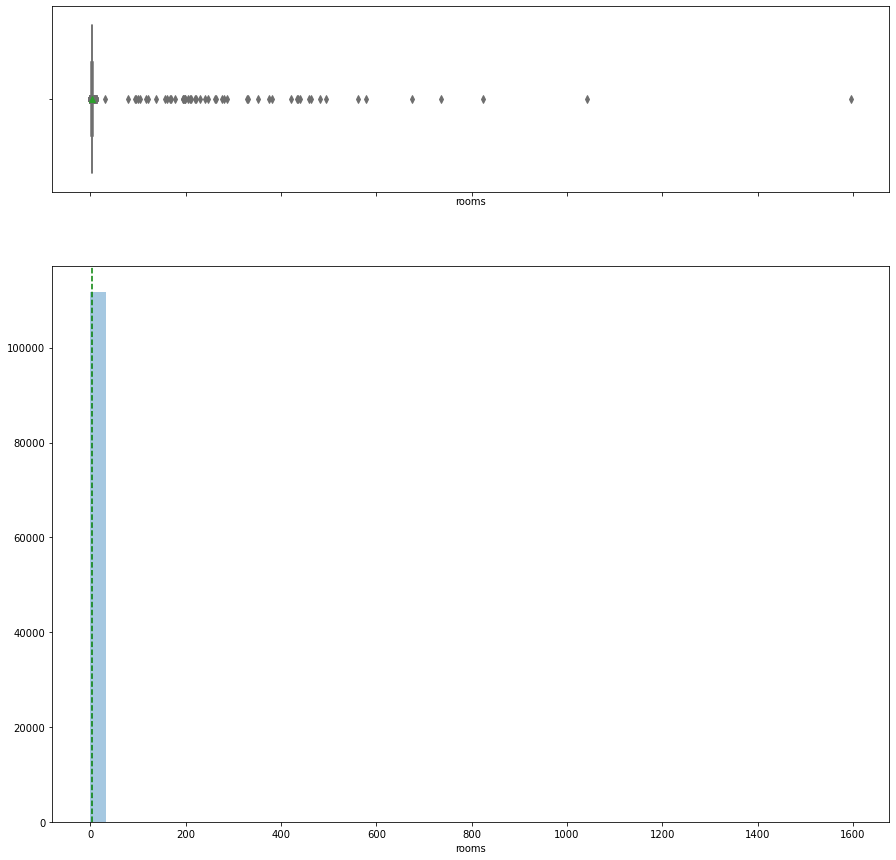

In [18]:
histogram_boxplot(data['rooms'])


# Observation on roomms shows that it has a lot of outliers as there are observations that are very far from the upper whisker in the boxplot
# 
# Most if not all rooms are between 0-30 thereabout
# 


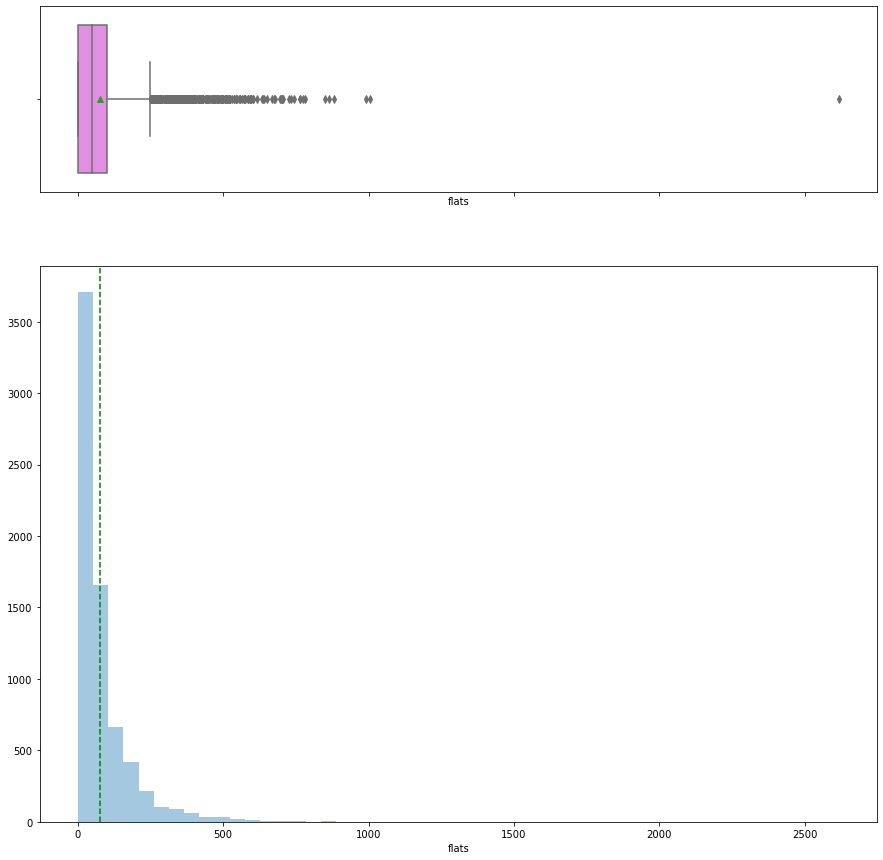

In [19]:
# OBSERVATIONS/INSIGHT ON flats
histogram_boxplot(data['flats'])


# Flats is rightly skewed
# 
# it has outliers
# 
# Most flats are between 0 to 200

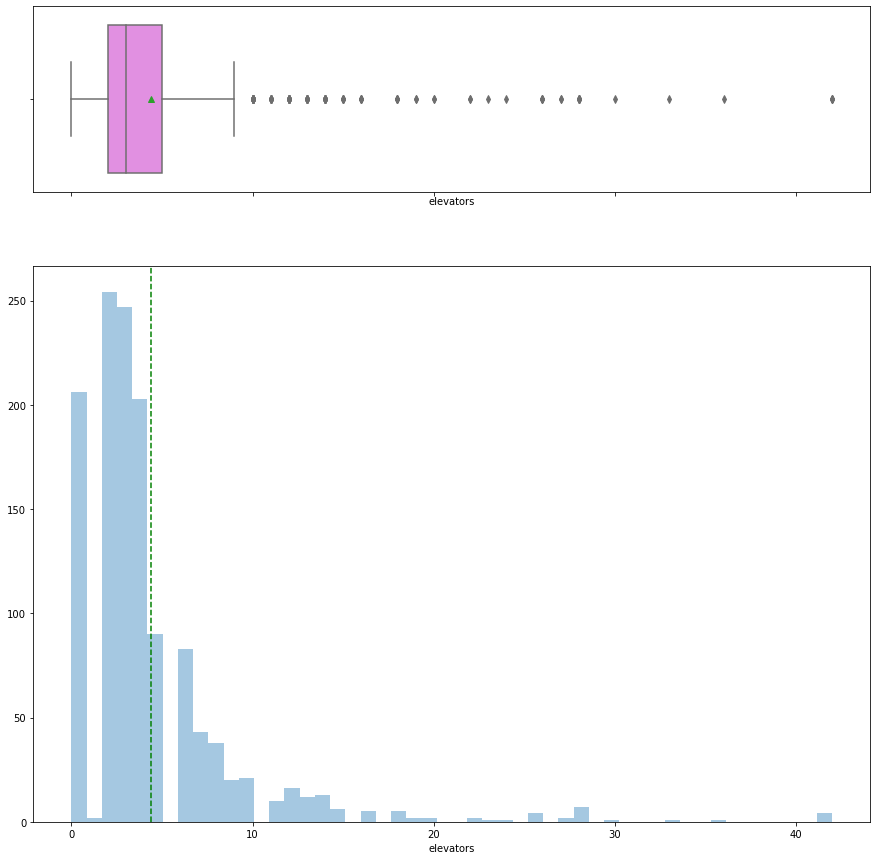

In [20]:
histogram_boxplot(data['elevators'])


# The elevators is rightly skewed
# The  distribution of elevators shows that it  has outliers
# 
# 

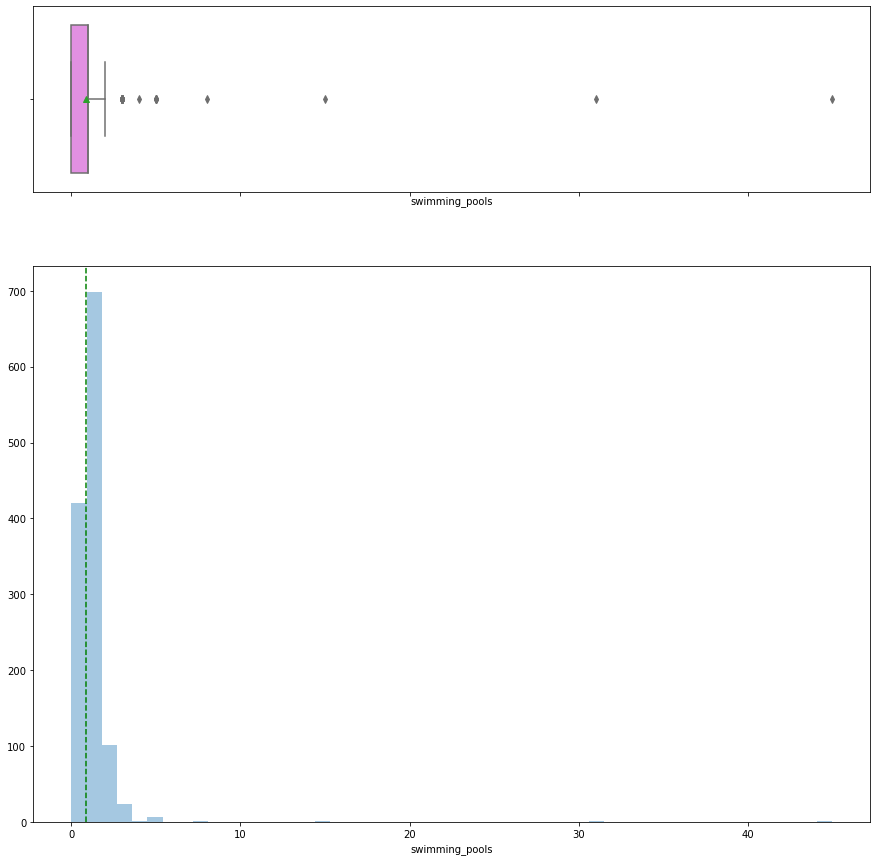

In [21]:
histogram_boxplot(data['swimming_pools'])


# Swimming pool is rightly skewed 
# 
# It has a lot of outliers as well

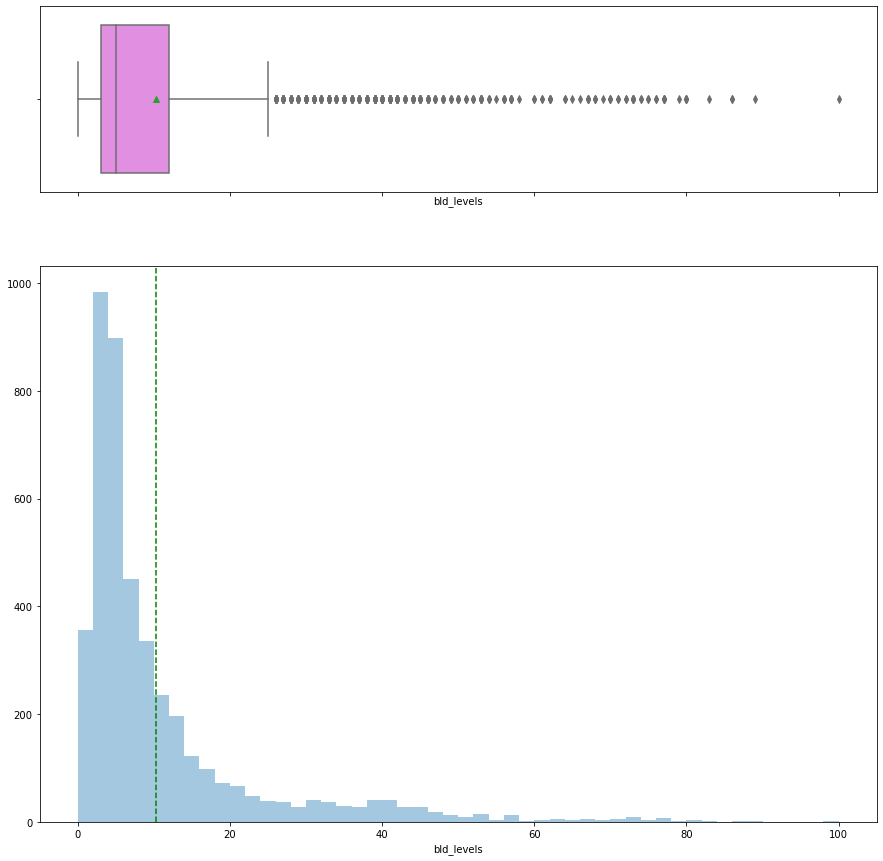

In [22]:
histogram_boxplot(data['bld_levels'])


# bld_levels is rightly skewed
# 
# most bld_levesl are between 1 to 15
# 
# There are some observation on the right of the boxplot which can be considered as outliers. Let's how many such extreme values are there

In [23]:
data[(data.bld_levels>20)]


# The result is much so we will not remove them

# # Let's define one more function to plot stacked bar charts to see relationship between registered buildings and other categorical variables

# # Correlation Heatmap

,area_id,zone_id,area_name_ar,area_name_en,land_number,land_sub_number,building_number,common_area,actual_common_area,floors,...,pre_registration_number,master_project_id,master_project_en,master_project_ar,project_id,project_name_ar,project_name_en,land_type_id,land_type_ar,land_type_en
7706,330,2,مرسى دبي,Marsa Dubai,17,0.0,4,NaN,NaN,38.0,...,NaN,34.0,Dubai Marina,دبي مارينا,NaN,NaN,NaN,4.0,تجارى,Commercial
7707,330,2,مرسى دبي,Marsa Dubai,17,0.0,1,NaN,NaN,29.0,...,NaN,34.0,Dubai Marina,دبي مارينا,NaN,NaN,NaN,4.0,تجارى,Commercial
7708,330,2,مرسى دبي,Marsa Dubai,17,0.0,3,NaN,NaN,21.0,...,NaN,34.0,Dubai Marina,دبي مارينا,NaN,NaN,NaN,4.0,تجارى,Commercial
7709,330,2,مرسى دبي,Marsa Dubai,18,0.0,1,NaN,NaN,38.0,...,NaN,34.0,Dubai Marina,دبي مارينا,NaN,NaN,NaN,4.0,تجارى,Commercial
7710,330,2,مرسى دبي,Marsa Dubai,18,0.0,2,NaN,NaN,25.0,...,NaN,34.0,Dubai Marina,دبي مارينا,NaN,NaN,NaN,4.0,تجارى,Commercial
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78478,445,2,جبل علي الأولى,Jabal Ali First,2626,0.0,1,NaN,NaN,19.0,...,NaN,12.0,Al Furjan,الفرجان,300806970.0,مورانو ريزيدنس 5,Murano Residence 5,4.0,تجارى,Commercial
78526,442,2,البرشاء جنوب الخامسة,Al Barsha South Fifth,291,0.0,1,NaN,NaN,26.0,...,NaN,10.0,Jumeirah Village Triangle,قرية جميرا المثلثة,301674157.0,كلاود,CLOUD,4.0,تجارى,Commercial
78527,442,2,البرشاء جنوب الخامسة,Al Barsha South Fifth,291,0.0,2,NaN,NaN,27.0,...,NaN,10.0,Jumeirah Village Triangle,قرية جميرا المثلثة,301674157.0,كلاود,CLOUD,4.0,تجارى,Commercial
81877,526,2,الخليج التجارى,Business Bay,332,0.0,1,NaN,NaN,28.0,...,NaN,112.0,Business Bay,الخليج التجاري,304480775.0,15 نورث سايد,15 Northside,4.0,تجارى,Commercial


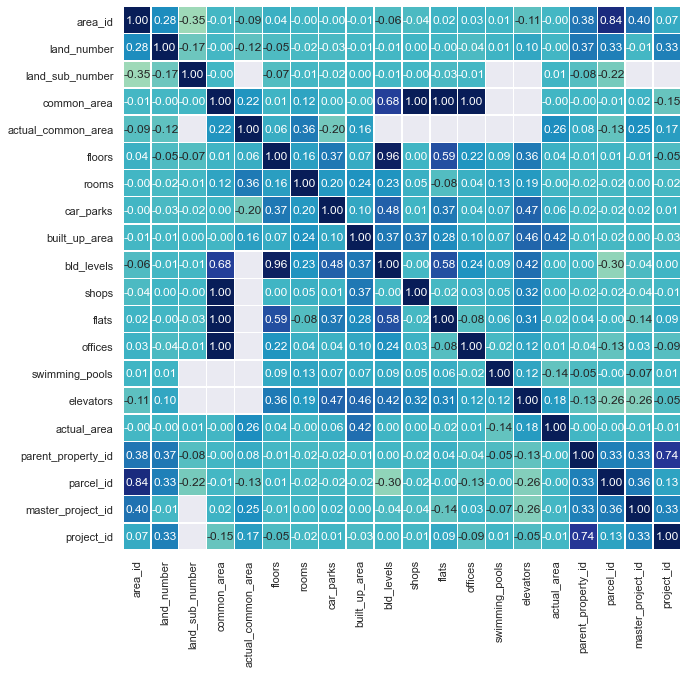

In [24]:
sns.set(rc={'figure.figsize':(10,10)})
sns.heatmap(data.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu",
            fmt='0.2f')
plt.show()


# Flats and Master_project_id are negatively correlated
# 
# Flats and rooms are nagatively correlated
# 
# Parcel_id and bld_levels are negatively correlated
# 
# bld_levels and floors are highly correlated which really make sense
# 
# common_areas and shop are highly correlated
# 